<a href="https://colab.research.google.com/github/saad-jameel/DL_Projects/blob/main/363520_SaadJameel_DL_Project1_TomatoDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connection to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/PlantVillageTomatoSplited.zip


Streaming output truncated to the last 5000 lines.
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e624f89-d4ae-421b-9e9f-dcccd20211ac___YLCV_GCREC 5437.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e832665-08e7-4d77-9ab0-39a5fe3c919a___UF.GRC_YLCV_Lab 02473.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e83510e-18e7-4c6d-9223-3450766715c8___UF.GRC_YLCV_Lab 01939.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e891a18-662b-41d6-9bf3-a50eb7f58fbe___YLCV_NREC 0231.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e924491-cb5f-4843-8f26-de597f552240___YLCV_NREC 2011.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLeaf__Curl_Virus/1e95f4dc-6fa2-4fbb-a8b3-426e43f95d69___UF.GRC_YLCV_Lab 03118.JPG  
  inflating: PlantVillageTomatoSplited/train/Tomato__Tomato_YellowLea

Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 43.9 MB/s eta 0:00:00


In [ ]:
import visualkeras

Tensor Flow Data Object (IMAGE TENSOR)

In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

Training Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory( ...
        '/content/PlantVillageTomatoSplited/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

In [ ]:
train_generator.class_indices

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

VALIDATION IMAGE DATA --> INPUT TENSOR


In [ ]:
  validation_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range=10,
          horizontal_flip=True)
  validation_generator = validation_datagen.flow_from_directory(
          '/content/PlantVillageTomatoSplited/val',
          target_size=(IMAGE_SIZE,IMAGE_SIZE),
          batch_size=32,
          class_mode="sparse"
  )

Found 3198 images belonging to 10 classes.


TEST IMAGE DATA --> INPUT TENSOR

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/PlantVillageTomatoSplited/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


# **MODEL GENERATION**

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (1,1), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (5,5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((1, 1)),
    layers.Conv2D(64, (7, 7), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        102464    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

# **MODEL VISUALIZATION**

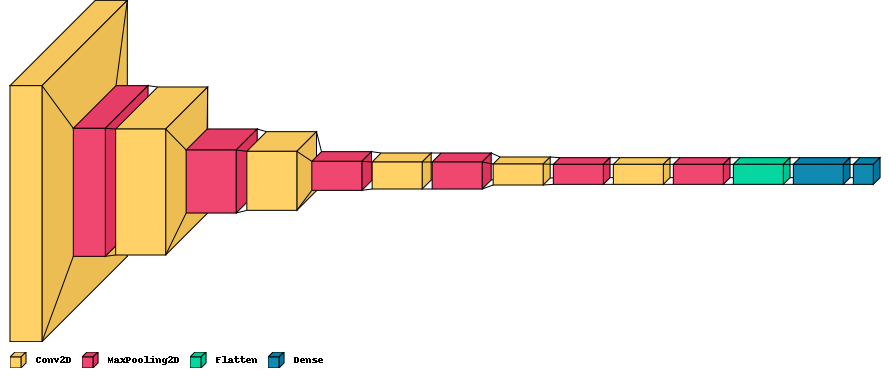

In [ ]:
visualkeras.layered_view(model,legend=True,scale_xy=1, scale_z=1,max_z=50 )

# **MODEL COMPILATION**


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# **MODEL TRAINING**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=99,
    verbose=1,
    epochs=20,
)

Epoch 1/20
350/350 [==============================] - 219s 594ms/step - loss: 1.7110 - accuracy: 0.3958 - val_loss: 1.2751 - val_accuracy: 0.5540
Epoch 2/20
200/350 [================>.............] - ETA: 1:07 - loss: 1.2221 - accuracy: 0.5809

In [ ]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 24s 465ms/step - loss: 0.1876 - accuracy: 0.9435


In [ ]:
scores

[0.1876073032617569, 0.9434782862663269]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

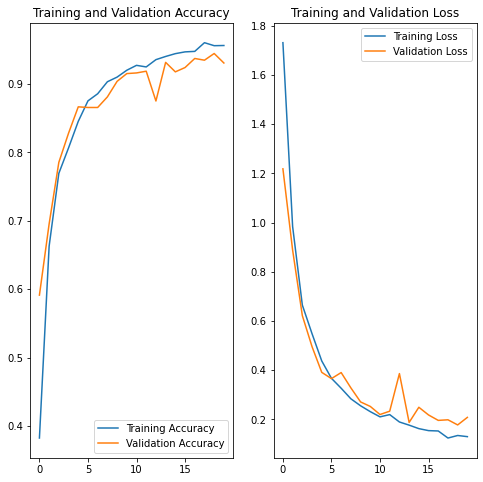

In [ ]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


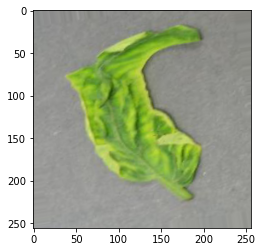

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

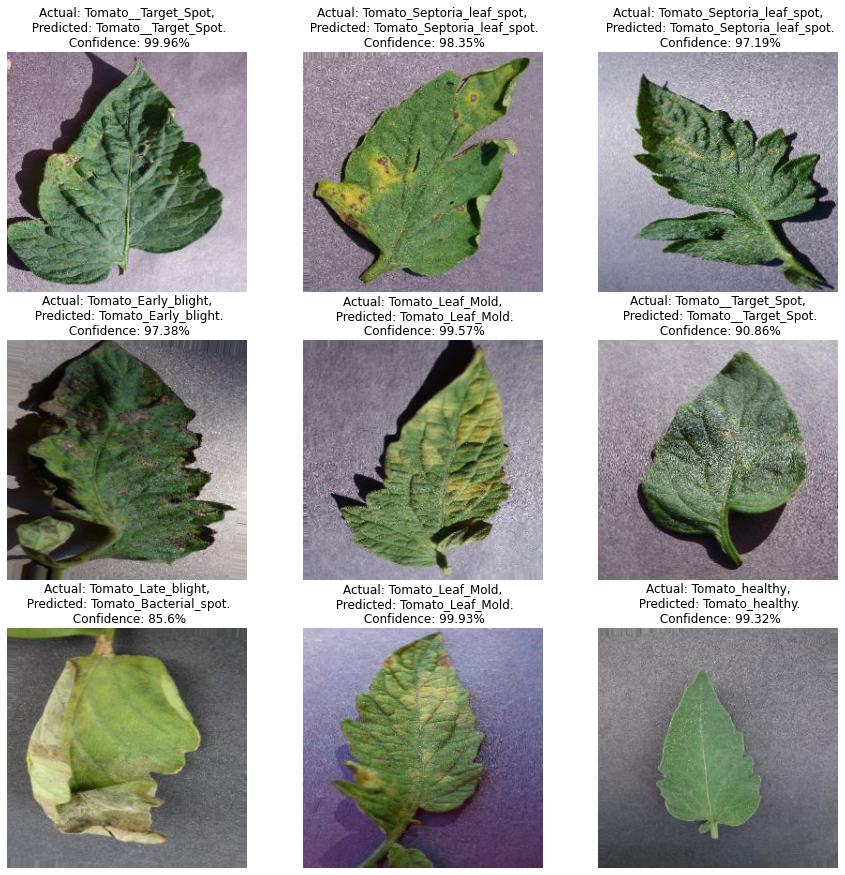

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [ ]:
model.save("../potatoes.h5")